In [2]:
import ROOT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-pdn0rr5j because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [57]:
def genPlot(csvfile,runMin,runMax):
    
    df = pd.read_csv(csvfile)
    df = df.loc[(df['Run']>=runMin) & (df['Run']<=runMax)]
    N = len(df['Run'])
    
    df = df.sort_values('Run')
    run = df['Run'].to_numpy()
    fcup_pos = df['fcup_pos'].to_numpy()
    fcup_neg = df['fcup_neg'].to_numpy()
    fcup_zero = df['fcup_zero'].to_numpy()
    fcup_bad = df['fcup_bad'].to_numpy()
    fcup_total = fcup_pos+fcup_neg+fcup_zero+fcup_bad
    nposr = df['npos_recon'].to_numpy()
    nnegr = df['nneg_recon'].to_numpy()
    nzeror = df['nzero_recon'].to_numpy()
    nr_total = nposr+nnegr+nzeror
    npost = df['npos_train'].to_numpy()
    nnegt = df['nneg_train'].to_numpy()
    nzerot = df['nzero_train'].to_numpy()
    nt_total = npost+nnegt+nzerot
    
    runMin = np.amin(run)
    runMax = np.amax(run)
    
    print("Run range --> [{},{}]".format(runMin,runMax))
    
    
    # %-age's vs Runs
    fig1, axs1 = plt.subplots(2,2,figsize=(15, 15))
    axs1[0,0].plot(run,fcup_pos/fcup_total,"ko",label="hel=+1")
    axs1[0,0].plot(run,fcup_neg/fcup_total,"gX",label="hel=-1")
    axs1[0,0].plot(run,fcup_zero/fcup_total,"k^",label="hel=0")
    axs1[0,0].plot(run,fcup_bad/fcup_total,"k*",label="hel=??")
    axs1[0,0].set_xlabel("Run")
    axs1[0,0].set_ylabel("Faraday Cup %-age")
    axs1[0,0].set_title("%-age FCup for each helicity in HEL::scaler")
    axs1[0,0].legend()
    axs1[0,0].grid()
    
    axs1[1,0].plot(run,nposr/nr_total,"ko",label="hel=+1")
    axs1[1,0].plot(run,nnegr/nr_total,"gX",label="hel=-1")
    axs1[1,0].plot(run,nzeror/nr_total,"k^",label="hel=0")
    axs1[1,0].set_xlabel("Run")
    axs1[1,0].set_ylabel("Hel counts %-age")
    axs1[1,0].set_title("%-age helicity counts in HEL::online (RECON HIPO)")
    axs1[1,0].legend()
    axs1[1,0].grid()
    
    axs1[0,1].plot(run,npost/nt_total,"ko",label="hel=+1")
    axs1[0,1].plot(run,nnegt/nt_total,"gX",label="hel=-1")
    axs1[0,1].plot(run,nzerot/nt_total,"k^",label="hel=0")
    axs1[0,1].set_xlabel("Run")
    axs1[0,1].set_ylabel("Hel counts %-age")
    axs1[0,1].set_title("%-age helicity counts in HEL::online (TRAIN HIPO)")
    axs1[0,1].legend()
    axs1[0,1].grid()
    
    axs1[1,1].plot(run,npost/nt_total,"ko",label="hel=+1")
    axs1[1,1].plot(run,nnegt/nt_total,"gX",label="hel=-1")
    axs1[1,1].plot(run,nzerot/nt_total,"k^",label="hel=0")
    axs1[1,1].set_xlabel("")
    axs1[1,1].set_ylabel("(FC+ - FC-)/(FC+ + FC-)")
    axs1[1,1].set_title("%-age helicity counts in HEL::online (TRAIN HIPO)")
    axs1[1,1].legend()
    axs1[1,1].grid()
    return

# Comparing HEL::online and HEL::scaler
---
Purpose: To investigate the beam charge asymmetries present in RG-C data

How this program works is by reading *util/runHelicityCounts.csv*. Here is a description of the columns
1. Run Number
*for a given run number's recon files, in hipo bank HEL::online...*

2. Number of Helicity +1 events
3. Number of Helicity -1 events
4. Number of Helicity 0 events
*for a given run number's recon files, in HEL::scaler...*

5. Integrated Faraday Cup charge for Helicity +1
6. Integrated Faraday Cup charge for Helicity -1
7. Integrated Faraday Cup charge for Helicity 0
8. Integrated Faraday Cup charge for Helicity **undefined**

In [58]:
csvfile = "/work/clas12/users/gmat/CLAS12Analysis/util/runHelicityCounts.csv"

runMin = 16700
runMax = 16771

Run range --> [16709,16771]


,Run,npos_recon,nneg_recon,nzero_recon,npos_train,nneg_train,nzero_train,fcup_pos,fcup_neg,fcup_zero,fcup_bad
10,16709,2040609,1975149,12347275,875153,839464,370145,4334.740,4346.600,148.7710,6555.320
63,16710,2117215,2049400,12381947,909632,873411,295698,838.291,838.183,27.8572,1254.420
70,16711,3071220,2976873,17928144,1308898,1256853,399993,3069.580,3038.490,140.6970,4522.150
71,16712,3145629,3037071,18517455,1361872,1304844,462822,4706.960,4714.250,204.2950,7050.270
48,16713,1561788,1503039,9054062,670517,640999,198037,4511.770,4512.360,205.4410,6699.160
12,16715,1547594,1492089,9121114,661862,633152,223096,4469.940,4484.560,208.0900,6650.690
18,16719,1498706,1551379,9127276,638704,666221,215762,1500.370,1520.640,68.1951,2252.600
33,16723,4189414,4082737,24384908,1776692,1712949,526946,2156.800,2153.900,71.9560,3203.900
30,16727,4205791,4098825,24484006,1795037,1733350,548944,12229.300,12240.900,417.2600,18046.400
16,16729,1439194,1410854,8375329,624162,604507,182079,3398.580,3395.810,111.7050,5058.400


[15385.431   2958.7512 10770.917  16675.775  15928.731  15813.28
  5341.8051  7586.556  42933.86   11964.495  23486.979  21419.485
 11903.09   12576.76   25176.28   29272.763   1692.1733 16224.622
 38688.92    7224.519  24194.001   7721.8042 12563.372  20968.754
  1285.5714]


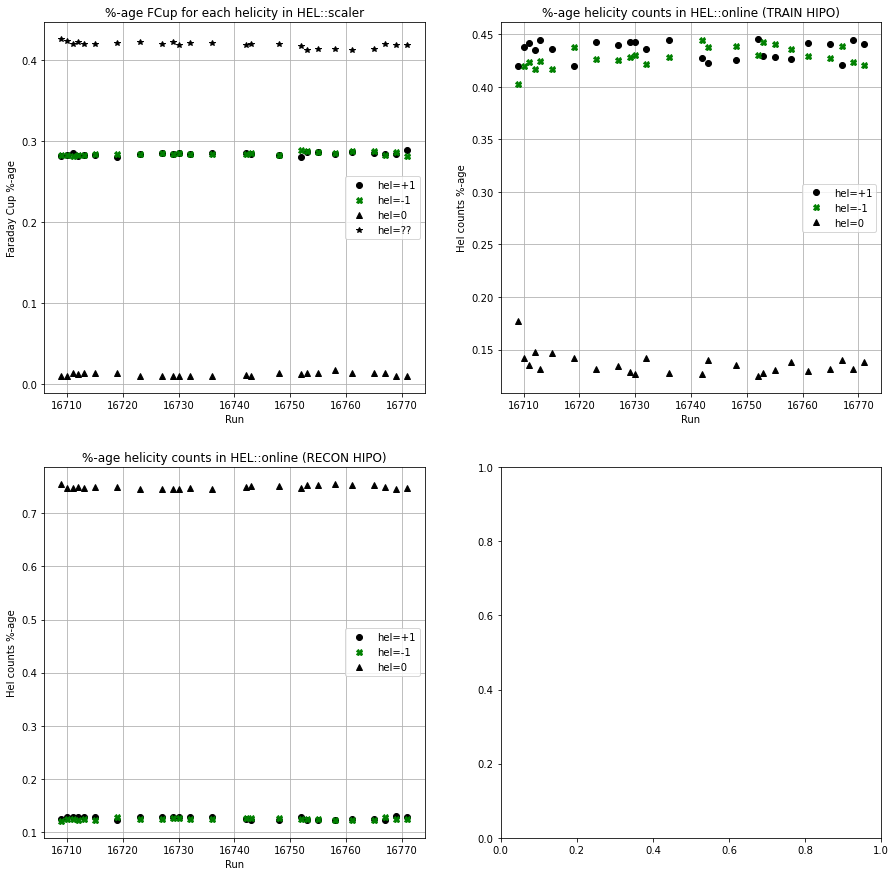

In [59]:
genPlot(csvfile,runMin,runMax)

In [64]:
df_greg = pd.read_csv(csvfile)
df_greg = df_greg.loc[(df_greg['Run']>=runMin) & (df_greg['Run']<=runMax)]
df_greg = df_greg.sort_values("Run")
df_noemie = pd.read_csv('/work/clas12/pilleux/beamCharge_16292_16771.txt',sep='\t')
df_noemie = df_noemie.loc[(df_noemie['run']>=runMin) & (df_noemie['run']<=runMax)]

In [72]:
df_noemie["total"] = df_noemie["1"]+df_noemie["-1"]+df_noemie["undef"]
df_noemie["total2"] = 2*df_noemie["1"]+2*df_noemie["-1"]+df_noemie["undef"]

In [80]:
a = df_greg["Run"].to_numpy(dtype=float)
b = df_noemie["run"].to_numpy(dtype=float)

runs = 

In [84]:
display(df_greg.sort_values("npos_train"))

,Run,npos_recon,nneg_recon,nzero_recon,npos_train,nneg_train,nzero_train,fcup_pos,fcup_neg,fcup_zero,fcup_bad
16,16729,1439194,1410854,8375329,624162,604507,182079,3398.580,3395.810,111.7050,5058.400
18,16719,1498706,1551379,9127276,638704,666221,215762,1500.370,1520.640,68.1951,2252.600
12,16715,1547594,1492089,9121114,661862,633152,223096,4469.940,4484.560,208.0900,6650.690
48,16713,1561788,1503039,9054062,670517,640999,198037,4511.770,4512.360,205.4410,6699.160
5,16753,1807291,1832283,11100781,687911,710376,205479,4647.530,4672.630,212.0520,6692.410
19,16742,1791358,1842959,10876675,738543,768178,219634,3595.540,3577.860,136.7000,5266.660
17,16758,1969784,1984479,12204755,750931,766845,242645,2051.400,2057.840,126.7290,2988.550
24,16752,1994146,1948095,11655776,820843,792754,229882,474.847,490.123,19.9453,707.258
51,16767,2022748,2099595,12311236,845863,883845,282812,3565.120,3554.500,169.9820,5273.770
10,16709,2040609,1975149,12347275,875153,839464,370145,4334.740,4346.600,148.7710,6555.320


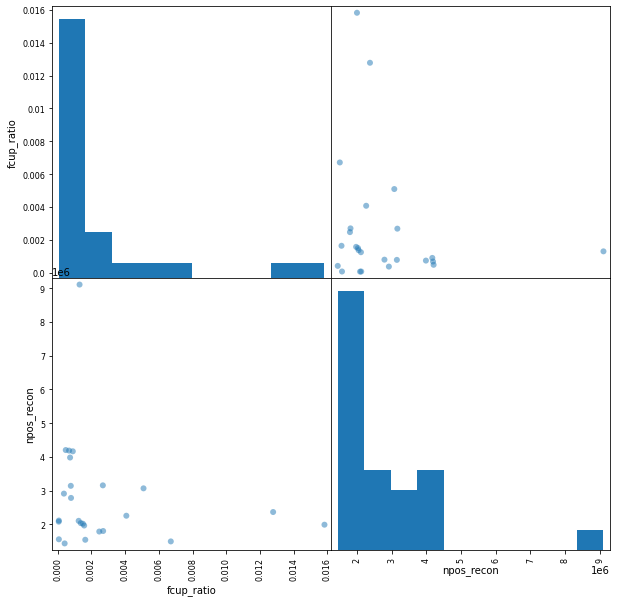

In [102]:
df_greg["fcup_ratio"]=np.abs((df_greg["fcup_pos"]-df_greg["fcup_neg"])/(df_greg["fcup_pos"]+df_greg["fcup_neg"]))



pd.plotting.scatter_matrix(df_greg[["fcup_ratio","npos_recon"]],figsize=(10,10),marker="o")
plt.show()